In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

import pkg_resources
import types

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ebaaaj9p because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is dep

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(1)

In [20]:
import finlab_crypto
finlab_crypto.setup()
df = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1h')
#df = pd.read_csv('./history/BTCUSDT-1h-data.csv')


All caught up..!


test = df.drop(df.head(380).index)
test = test.dropna()
#df = df.drop(df.head(594).index)
df = df.drop(df.tail(90).index)
df = df.dropna()

In [21]:
test = df.tail(2304)
df = df.head(3000)

In [22]:
test.describe()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2.304000e+03,2.304000e+03,2304.000000,2304.000000,2.304000e+03,2304.0
mean,45593.071775,45950.480308,45212.563077,45606.162778,3630.402650,1.613532e+12,1.585153e+08,92256.286892,1795.945839,7.845430e+07,0.0
std,9848.851026,9845.090759,9859.485536,9846.423118,2456.454146,2.397807e+09,9.844307e+07,43876.287704,1235.852931,4.968431e+07,0.0
min,28371.520000,28523.470000,27850.000000,28371.510000,0.000000,1.609384e+12,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
25%,35866.070000,36192.897500,35518.747500,35877.992500,2186.238739,1.611456e+12,1.004984e+08,64371.750000,1064.655816,4.936787e+07,0.0
50%,47435.955000,47860.290000,47027.810000,47450.725000,2976.011621,1.613533e+12,1.333643e+08,82407.000000,1482.686967,6.533103e+07,0.0
75%,55237.357500,55637.560000,54820.905000,55240.177500,4232.052566,1.615609e+12,1.845438e+08,108096.000000,2096.532672,9.227551e+07,0.0
max,61648.260000,61844.000000,61089.980000,61648.260000,32057.769171,1.617682e+12,1.252120e+09,554876.000000,17431.615148,6.363879e+08,0.0


In [23]:
test.tail()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-04-05 23:00:00+00:00,58877.18,59130.00,58533.10,59129.99,1873.069762,1.617667e+12,1.100279e+08,68480.0,947.389380,5.566030e+07,0.0
2021-04-06 00:00:00+00:00,59129.99,59479.00,59043.47,59356.23,3279.189201,1.617671e+12,1.943435e+08,152874.0,1901.237815,1.126879e+08,0.0
2021-04-06 01:00:00+00:00,59356.23,59495.24,58728.10,58800.01,2467.891456,1.617674e+12,1.458471e+08,85771.0,1220.331439,7.213369e+07,0.0
2021-04-06 02:00:00+00:00,58800.02,58868.96,58635.72,58745.27,1448.834443,1.617678e+12,8.513879e+07,48958.0,716.536815,4.210527e+07,0.0
2021-04-06 03:00:00+00:00,58745.28,58947.35,58712.27,58874.60,589.300366,1.617682e+12,3.465779e+07,21529.0,299.243654,1.759832e+07,0.0


In [24]:
df.describe()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000
mean,6957.719077,7028.702663,6886.353250,6961.995140,125.792245,1.508365e+12,1.398109e+06,834.371000,63.324033,7.137495e+05,20240.466015
std,3903.626306,3961.542924,3840.610687,3907.686004,173.902371,3.124203e+09,2.732335e+06,1181.656787,96.328946,1.453939e+06,15393.810336
min,2870.900000,2950.000000,2817.000000,2919.000000,0.052699,1.502946e+12,2.178716e+02,3.000000,0.004000,1.470000e+01,0.000000
25%,4280.030000,4314.542500,4247.350000,4280.527500,29.235338,1.505670e+12,1.251629e+05,260.000000,11.199196,4.999542e+04,11095.050478
50%,5658.465000,5689.995000,5620.000000,5659.070000,59.670257,1.508369e+12,3.213727e+05,437.000000,28.182416,1.509092e+05,13168.913616
75%,7815.080000,7886.510000,7756.252500,7833.312500,147.400539,1.511068e+12,1.150911e+06,814.250000,70.512287,5.466301e+05,23679.387591
max,19709.500000,19798.680000,19552.000000,19709.500000,1831.436840,1.513768e+12,3.155096e+07,17864.000000,995.047653,1.426553e+07,79920.622111


In [25]:
class Deep_Evolution_Strategy:

    inputs = None

    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-7)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')



class Model():
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        return decision

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(self, model, window_size, trend, skip, initial_money, initial_crypto):
        self.model = model
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        self.initial_crypto = initial_crypto
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision = self.model.predict(np.array(sequence))
        return np.argmax(decision[0])
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def get_reward(self, weights):
        initial_money = self.initial_money
        initial_crypto= self.initial_crypto
        starting_money = initial_money
        self.model.weights = weights
        state = self.get_state(0)
        inventory = []
        
        quantity = 0
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_crypto = starting_money / self.trend[t]
                starting_money = 0

                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                starting_money = initial_crypto*self.trend[t]
                initial_crypto = 0
              
    
            
            state = next_state
        return ((starting_money - initial_money) / initial_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        initial_crypto = self.initial_crypto
        state = self.get_state(0)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_crypto = initial_money / self.trend[t]
                initial_money = 0
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_crypto*self.trend[t]))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0) 
                initial_money = initial_crypto*self.trend[t]
                initial_crypto = 0
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest

In [26]:
close = df.close.values.tolist()
window_size = 60
skip = 1
initial_money = 100000
initial_crypto = 0

model = Model(window_size, 500, 3)
agent = Agent(model = model, 
              window_size = window_size,
              trend = close,
              skip = skip,
              initial_money = initial_money,
              initial_crypto = 0)
agent.fit(iterations=150, checkpoint=10)



iter 10. reward: 300.143399
iter 20. reward: 856.139098
iter 30. reward: 1278.135648
iter 40. reward: 2102.943113
iter 50. reward: 2630.163396
iter 60. reward: 2837.015295


KeyboardInterrupt: 

day 0: buy 1 unit at price 2.155000, total balance 100000.000000
day 59, sell 1 unit at price 2.728000, investment 26.589327 %, total balance 126589.327146,
day 61: buy 1 unit at price 2.652000, total balance 126589.327146
day 63, sell 1 unit at price 2.688000, investment 1.357466 %, total balance 128307.734302,
day 64: buy 1 unit at price 2.673000, total balance 128307.734302
day 65, sell 1 unit at price 2.756000, investment 3.105125 %, total balance 132291.850257,
day 67: buy 1 unit at price 2.460000, total balance 132291.850257
day 69, sell 1 unit at price 2.448000, investment -0.487805 %, total balance 131646.524158,
day 71: buy 1 unit at price 2.576000, total balance 131646.524158
day 76, sell 1 unit at price 2.726000, investment 5.822981 %, total balance 139312.276729,
day 79: buy 1 unit at price 2.426000, total balance 139312.276729
day 91, sell 1 unit at price 2.378000, investment -1.978566 %, total balance 136555.892029,
day 93: buy 1 unit at price 2.235000, total balance 1365

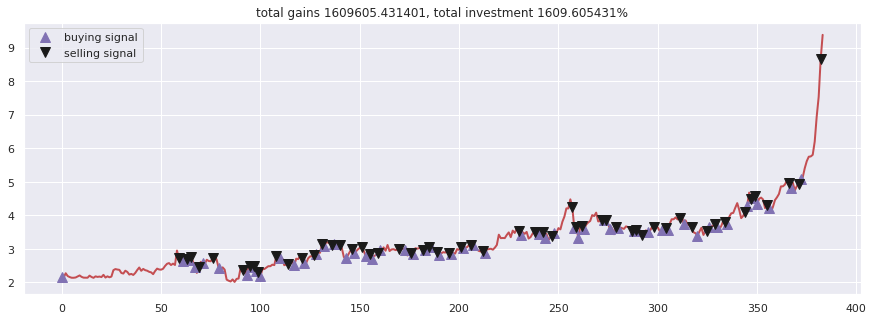

In [11]:

states_buy, states_sell, total_gains, invest = agent.buy()

fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

day 2: buy 1 unit at price 29028.350000, total balance 100000.000000
day 5, sell 1 unit at price 29155.250000, investment 0.437159 %, total balance 100437.158846,
day 8: buy 1 unit at price 29136.490000, total balance 100437.158846
day 9, sell 1 unit at price 28910.300000, investment -0.776312 %, total balance 99657.453365,
day 11: buy 1 unit at price 28519.000000, total balance 99657.453365
day 12, sell 1 unit at price 28371.510000, investment -0.517164 %, total balance 99142.060897,
day 14: buy 1 unit at price 28380.600000, total balance 99142.060897
day 16, sell 1 unit at price 28872.250000, investment 1.732345 %, total balance 100859.543764,
day 18: buy 1 unit at price 29126.700000, total balance 100859.543764
day 19, sell 1 unit at price 28966.360000, investment -0.550491 %, total balance 100304.320575,
day 22: buy 1 unit at price 28995.130000, total balance 100304.320575
day 31, sell 1 unit at price 29202.210000, investment 0.714189 %, total balance 101020.682899,
day 32: buy 1 u

day 2072, sell 1 unit at price 54291.280000, investment -1.312662 %, total balance 155898.673840,
day 2073: buy 1 unit at price 54735.640000, total balance 155898.673840
day 2077, sell 1 unit at price 56084.740000, investment 2.464756 %, total balance 159741.195840,
day 2082: buy 1 unit at price 56370.940000, total balance 159741.195840
day 2088, sell 1 unit at price 56272.490000, investment -0.174647 %, total balance 159462.213075,
day 2090: buy 1 unit at price 55935.610000, total balance 159462.213075
day 2091, sell 1 unit at price 56200.660000, investment 0.473848 %, total balance 160217.822240,
day 2093: buy 1 unit at price 56114.950000, total balance 160217.822240
day 2096, sell 1 unit at price 55525.240000, investment -1.050896 %, total balance 158534.098884,
day 2097: buy 1 unit at price 55750.000000, total balance 158534.098884
day 2099, sell 1 unit at price 56354.350000, investment 1.084036 %, total balance 160252.665389,
day 2100: buy 1 unit at price 56275.590000, total balan

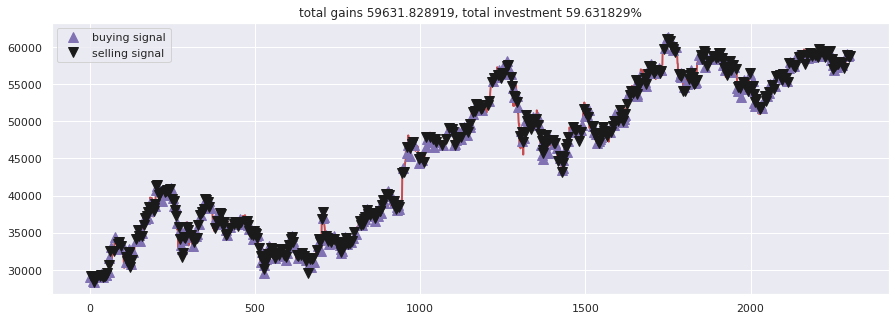

In [27]:
close = test.close.values.tolist()
window_size = 60
skip = 1
initial_money = 100000
initial_crypto = 0
model = Model(window_size, 500, 3)
agent = Agent(model = model, 
              window_size = window_size,
              trend = close,
              skip = skip,
              initial_money = initial_money, 
              initial_crypto = initial_crypto)
states_buy, states_sell, total_gains, invest = agent.buy()

fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()